## 2. Machine Learning for Regression


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [34]:
df = pd.read_csv('housing.txt')

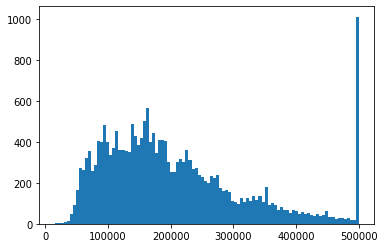

In [35]:
plt.hist(df.median_house_value, bins=100)
plt.show()

In [36]:
df = df[['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']]

## Question 1
Find a feature with missing values. How many missing values does it have?

In [37]:
df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

## Question 2
What's the median (50% percentile) for variable 'population'?

In [38]:
df.population.median()

1166.0

## 2.4 Setting up the validation framework

In [39]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [70]:
def train_val_test_split(df, seed=42):
    df_train = df.iloc[:n_train]
    df_val = df.iloc[n_train:n_train+n_val]
    df_test = df.iloc[n_train+n_val:]

    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    return df_train, df_val, df_test, y_train, y_val, y_test

In [71]:
df_train, df_val, df_test, y_train, y_val, y_test = train_val_test_split(df, 42)

In [72]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [73]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

## Question 3

In [74]:
def prepare_X(df, method=0):
    df_num = df[base]
    if method == 0:
        df_num = df_num.fillna(0)
    elif method == 1:
        for col in df_num.columns:
            df_num[col] = df_num[col].fillna(df_num[col].mean())
    elif method == 2:
        for col in df_num.columns:
            df_num[col] = df_num[col].fillna(df_num[col].median())
    X = df_num.values
    return X

In [76]:
for m in [0, 1, 2]:
    print(f'method={m}')
    X_train = prepare_X(df_train, m)
    w0, w = train_linear_regression(X_train, y_train)
    X_val = prepare_X(df_val, m)
    y_pred = w0 + X_val.dot(w)
    print(round(rmse(y_val, y_pred), 2))

method=0
0.33
method=1
0.33
method=2
0.33


## Question 4

In [77]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [78]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, round(score, 2))

0 -11.686975241328462 0.33
1e-06 -11.686959175450207 0.33
0.0001 -11.685368864762555 0.33
0.001 -11.670931317675844 0.33
0.01 -11.528493585241145 0.33
0.1 -10.27450028180433 0.33
1 -4.920480897649868 0.33
5 -1.4820957456372645 0.34
10 -0.7899311831436997 0.34


## Question 5

In [81]:
mas = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_train, df_val, df_test, y_train, y_val, y_test = train_val_test_split(df, seed)
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression(X_train, y_train)
    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, round(score, 2))
    mas.append(score)
print(round(np.std(mas), 3))

10 -11.900382138009979 0.34
10 -11.732757373456767 0.34
10 -11.806729360745186 0.33
10 -11.587900347275365 0.34
10 -11.389470587570775 0.34
10 -11.44711427550303 0.34
10 -11.370516350653025 0.35
10 -12.47344891880829 0.34
10 -11.800287429154132 0.35
10 -11.45904683070461 0.34
0.004


## Question 6

In [89]:
df_train, df_val, df_test, y_train, y_val, y_test = train_val_test_split(df, 9)
df_train_val = pd.concat([df_train, df_val])
X_train = prepare_X(df_train_val, 0)
y_train_val = np.concatenate([y_train, y_val])
w0, w = train_linear_regression(X_train, y_train_val)
X_val = prepare_X(df_test, 0)
y_pred = w0 + X_val.dot(w)
score = rmse(y_test, y_pred)

print(r, w0, round(score, 2))

10 -11.419659427247325 0.35
